## What is my name?

# Very nice

# Introduction

Predicting house prices is an crucial to some companies including Zoopla, RightMove and Zillow. Theses companies apply statistical and machine learning techniques to specify the valuation of the houses. One of the methods which can be used for this purpose is regression analysis. Regression analysis is a statistical approch used to find the reason of the something occures which can be utilized for the future prediction. <br>
there are some intresting relation between features of houses. For instance, the relationship between the number of floors in a house and the area of the land. It is obvious that as the number of the floor decrease, the area of the land increase so that in the city centers with tall building have smaller areas. Other examples is the relationship between the age of the buildings and their size. It is crucial to know since it presents how people's demand have been changed over time which can have impact on the social studies. on the other hands, changinf the size of the houses can also be interesting for economists to respond the question of the living cost when they only take into account the prices. 

## Dataset

The dataset of the house prices for the king county located in the Washington Sate in the USA was used was downloaded from the king GISportal. The dataset includes 21,613 obsevation with 19 features. Table 1 shows the features: <br> For this study 6 areas based on the zip codes which includes large number of the observation was selected.

## Mrthodology

## Scripts

In [1]:
import graphlab as gl

In [2]:
gl.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS',4)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\R_Python\AppData\Local\Temp\graphlab_server_1548862532.log.0


This non-commercial license of GraphLab Create for academic use is assigned to behzad.valipour@ut.ee and will expire on January 02, 2020.


In [3]:
house_data = gl.SFrame("C:\Users\R_Python\ML\Week02_Practice\home_data.csv")

Finished parsing file C:\Users\R_Python\ML\Week02_Practice\home_data.csv

Parsing completed. Parsed 100 lines in 0.095005 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,str,long,long,float,long,long,float,long,long,long,long,long,long,long,long,long,float,float,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\R_Python\ML\Week02_Practice\home_data.csv

Parsing completed. Parsed 21613 lines in 0.088005 secs.

In [4]:
house_data #General overvie of the dataset

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000,3,2.5,1890,6560,2.0,0,0


In [5]:
len(house_data) #number of the houses

21613

In [6]:
zip_code = set(house_data["zipcode"]) #different zipcodes in the king county
len(zip_code) #NUmer of the zip codes

70

In [7]:
gl.canvas.set_target("ipynb")
house_data.show(view="BoxWhisker Plot", x= "zipcode", y= "price")

In [8]:
#number of the different zip codes in the county
ls=[]
for i in zip_code:
    num_cont = 0
    for z in house_data["zipcode"]:
        if z == i:
            num_cont +=1
    ls.append((num_cont,i))

In [9]:
ls.sort( reverse = True) #sort the data based on the numer of the houses in each zipcode

In [10]:
selected_zip_code = [98103,98038,98115,98052,98117,98042] # Zip codes with large number of the building informations

In [11]:
# Put selected zip codes in the list
selected_ls = []
for z in selected_zip_code:
    selected_ls.append(house_data[house_data["zipcode"] == z ])

In [12]:
# Make a Sframe from the selected list (selected_ls)
selected_sframe = gl.SFrame()

r = 0
while r <len(selected_ls):
    selected_sframe= selected_sframe.append(selected_ls[r])
    r +=1

# Exploration of the Dataset

The aim of the section is to present the statistical relationship between the features; plus, their unexpected distribution and outliers to findout the whether they can be utilized for the purpose of the prediction or not.

## Relation between Zip codes & prices

In [13]:
gl.canvas.set_target("ipynb")
selected_sframe.show(view="BoxWhisker Plot", x= "zipcode", y= "price")

Among these six areas, area with zpcode 98052 has expensive building with average price 600,000 dollars. However, Area with zipcode 98042 with average price 300,000 has cheaper buildings.  In general, except for the tworegions, others has house price between 500,000 and 750,000 dollars in average.

## Relation between the area of the houses(sqft) & prices

In [14]:
selected_sframe.show(view="Scatter Plot", x= "sqft_living", y= "price")

As the graph shows there is a strong relationship between the prices and the size of the building, and it is possitive. Most of the area of the buiding in these six regions are between 1000 and 3000 squre feet, and their prices are mostly less than 1,000,000 Dollars.

## Number of the bathrooms in the houses

In [15]:
selected_sframe["bathrooms"].show(view='Numeric')

As the graph revealed the number of the bathrooms in average is 2.25 which shows that in most buildings bathrooms includes toilet as well. 

## Number of the floors in the houses

In [16]:
selected_sframe["floors"].show(view='Categorical')

As the table shows, 42.41% and 37.60% have 1 and 2 floors respectively, and only 3 buiding has more than 3 floors.

# Creating Regression Model

## Univariate linear regression model

In [17]:
# Creating "Training" & "Test" data
training_data,test_data = selected_sframe.random_split(0.8)

In [18]:
# Determination of the features
features = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement",
"yr_built","yr_renovated","zipcode","lat","long","sqft_living15"]

In [25]:
# Creating a Univariate linear regression model based on the training data
regression_model_sqft_living = gl.linear_regression.create(training_data, target='price', features= ["sqft_living"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2616

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.002000     | 1426211.267037     | 721778.346270        | 186167.271702 | 185128.717568   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [27]:
# Evaluation of the Univariate model based on the test data
regression_model_sqft_living.evaluate(test_data)

{'max_error': 951380.2197854347, 'rmse': 192842.4981900778}

In [21]:
#Importing the packages for visulisation
%matplotlib inline
import matplotlib.pyplot as plt

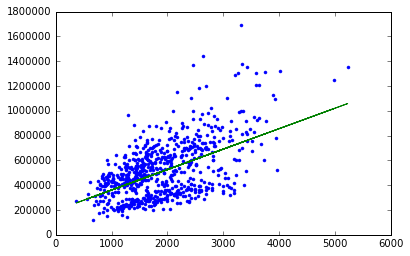

In [26]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],regression_model_sqft_living.predict(test_data),'-')

## Multivariate linear regression model

In [28]:
# Creating a Multivariate linear regression model based on the training data
regression_model = gl.linear_regression.create(training_data, target='price', features= features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2586

Number of features          : 17

Number of unpacked features : 17

Number of coefficients    : 18

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.012001     | 808074.840639      | 632510.355730        | 113997.370134 | 103916.133680   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [29]:
# Evaluation of the Multivariate model based on the test data
regression_model.evaluate(test_data)

{'max_error': 925878.9092424661, 'rmse': 121757.34011170373}

In [31]:
regression_model['coefficients']

name,index,value,stderr
(intercept),None,-25385147.4235,17813237.2588
bedrooms,None,1073.92814291,2566.92626864
bathrooms,None,14851.3376437,5644.23373031
sqft_living,None,55.9080038378,32891372.3801
sqft_lot,None,0.149690237844,0.0763975773707
floors,None,13219.2785623,5986.82549405
waterfront,None,871322.569906,68631.3220133
view,None,56551.2015504,4603.37860901
condition,None,10523.3091465,4047.53317045
grade,None,74307.2693312,3956.58438802


import csv
csv.register_dialect('myDialect', delimiter='/', quoting=csv.QUOTE_NONE)

myFile = open('csvexample4.csv', 'w')  
with myFile:  
   writer = csv.writer(myFile, dialect='myDialect')
   writer.writerows(ls)